## Tensorflow-Regression 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
x_data = np.linspace(0.0,10.0,1000000)

In [10]:
noise = np.random.randn(len(x_data))

In [12]:
x_data
noise

array([-0.49922946,  0.7829729 ,  0.10875819, ..., -0.39752073,
       -0.96092079,  0.82730932])

In [13]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [14]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [15]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [16]:
x_df.head()
y_df.head()

,Y
0,4.500771
1,5.782978
2,5.108768
3,6.251169
4,5.740227


In [17]:
my_data = pd.concat([x_df,y_df],axis=1)

In [18]:
my_data.head()

,X_Data,Y
0,0.00000,4.500771
1,0.00001,5.782978
2,0.00002,5.108768
3,0.00003,6.251169
4,0.00004,5.740227


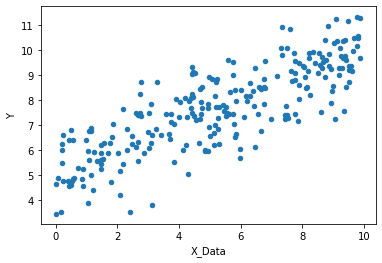

In [19]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [20]:
batch_size = 8

In [21]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [22]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [23]:
#model
y_model = m*xph + b

In [24]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [28]:
model_m


0.48005262

In [29]:
model_b

4.9548783

In [30]:
y_hat = x_data * model_m + model_b

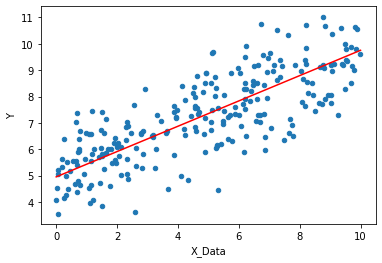

In [31]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

In [32]:

#Estimator API
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [33]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\JANEAL~1\\AppData\\Local\\Temp\\tmptwp0snl0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000B831805108>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:

# Train Test split
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=0)

In [36]:
x_train.shape
x_eval.shape

(300000,)

In [37]:

input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)

In [38]:

train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [39]:

eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [40]:

estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\JANEAL~1\A

In [41]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-30T12:02:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JANEAL~1\AppData\Local\Temp\tmptwp0snl0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-30-12:02:52
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.185552, global_step = 1000, label/mean = 7.511532, loss = 4.742208, prediction/mean = 7.4895835
INFO:tensorflow:Saving 'checkpoint_pa

In [43]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-30T12:06:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JANEAL~1\AppData\Local\Temp\tmptwp0snl0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-30-12:06:04
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.185552, global_step = 1000, label/mean = 7.511532, loss = 4.742208, prediction/mean = 7.4895835
INFO:tensorflow:Saving 'checkpoint_pa

In [44]:
input_fu_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)}, shuffle=False)

In [45]:
list(estimator.predict(input_fn=input_fu_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JANEAL~1\AppData\Local\Temp\tmptwp0snl0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2944145], dtype=float32)},
 {'predictions': array([4.998635], dtype=float32)},
 {'predictions': array([5.702855], dtype=float32)},
 {'predictions': array([6.4070754], dtype=float32)},
 {'predictions': array([7.1112957], dtype=float32)},
 {'predictions': array([7.815516], dtype=float32)},
 {'predictions': array([8.519736], dtype=float32)},
 {'predictions': array([9.223957], dtype=float32)},
 {'predictions': array([9.928177], dtype=float32)},
 {'predictions': array([10.632398], dtype=float32)}]

In [46]:
predictions = []
for x in estimator.predict(input_fn=input_fu_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JANEAL~1\AppData\Local\Temp\tmptwp0snl0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
predictions

[array([4.2944145], dtype=float32),
 array([4.998635], dtype=float32),
 array([5.702855], dtype=float32),
 array([6.4070754], dtype=float32),
 array([7.1112957], dtype=float32),
 array([7.815516], dtype=float32),
 array([8.519736], dtype=float32),
 array([9.223957], dtype=float32),
 array([9.928177], dtype=float32),
 array([10.632398], dtype=float32)]

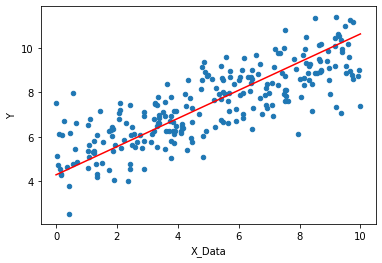

In [50]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(np.linspace(0,10,10), predictions, 'r')